# Read Astropy tables on PSF

- creation June 30th 2016
- author Sylvie Dagoret-Campagne
- Update July 6th 2016


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from astropy.modeling import models
from astropy import units as u
from astropy import nddata
from astropy.io import fits

from astropy.table import Table
from astropy.table import Column

import pandas as pd

In [2]:
intputtablefile1='HD163466_y4_1-8_TablePSF.fits'

In [3]:
 t1 = Table.read(intputtablefile1)

In [4]:
t1

num,file,time,exposure,nbstars,prfx,pfry,sig_prfx,sig_prfy
int32,str25,str23,float64,int32,float64,float64,float64,float64
0,AssScImHD163466_y4_1.fits,2016-05-10T08:43:22.192,3.0,23,2.80810530353,2.93709578691,0.0717107607457,0.0760826986652
1,AssScImHD163466_y4_2.fits,2016-05-10T08:43:29.513,3.0,23,2.68655532696,2.86879575208,0.0819848604541,0.0456488029924
2,AssScImHD163466_y4_3.fits,2016-05-10T08:43:36.463,3.0,25,2.64452856755,2.69076001366,0.0755942751507,0.0286223131641
3,AssScImHD163466_y4_4.fits,2016-05-10T08:43:43.448,3.0,30,2.6723065947,2.72932681468,0.0708837703989,0.249819800909
4,AssScImHD163466_y4_5.fits,2016-05-10T08:44:47.481,1.5,16,2.85770605392,2.76551370117,0.236654258462,0.0724385881085
5,AssScImHD163466_y4_6.fits,2016-05-10T08:44:52.918,1.5,14,2.78575614456,2.87539302862,0.0807985674717,0.0585594161166
6,AssScImHD163466_y4_7.fits,2016-05-10T08:44:58.453,1.5,11,2.77968098699,2.90044545098,0.0623518794852,0.0405807569436
7,AssScImHD163466_y4_8.fits,2016-05-10T08:45:04.001,1.5,13,2.66223236329,2.8031331225,0.0747038608423,0.08107409864


In [5]:
df1=t1.to_pandas()

In [6]:
df1.describe() # pandas able to show statistics

,num,exposure,nbstars,prfx,pfry,sig_prfx,sig_prfy
count,8.00000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,3.50000,2.250000,19.375000,2.737109,2.821308,0.094335,0.081603
std,2.44949,0.801784,6.781013,0.079907,0.087665,0.057832,0.070432
min,0.00000,1.500000,11.000000,2.644529,2.690760,0.062352,0.028622
25%,1.75000,1.500000,13.750000,2.669788,2.756467,0.071504,0.044382
50%,3.50000,2.250000,19.500000,2.733118,2.835964,0.075149,0.065499
75%,5.25000,3.000000,23.500000,2.791343,2.881656,0.081095,0.077331
max,7.00000,3.000000,30.000000,2.857706,2.937096,0.236654,0.249820


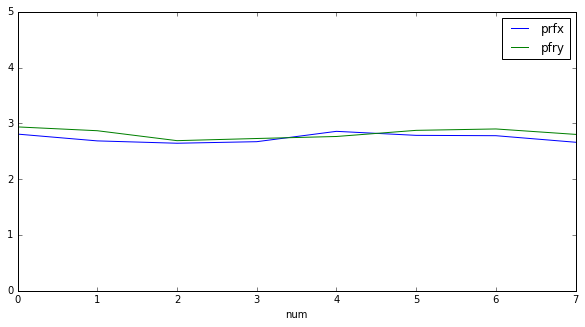

In [7]:
plt.figure(figsize=(10,6))
df1_2=df1[['num', 'prfx','pfry']]
df1_2.plot('num',['prfx','pfry'],ylim=(0.,5.),figsize=(10,5))
plt.legend(loc='upper right')
plt.show()

In [8]:
df1_no_missing = df1.dropna()

In [9]:
df1_no_missing.describe()

,num,exposure,nbstars,prfx,pfry,sig_prfx,sig_prfy
count,8.00000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,3.50000,2.250000,19.375000,2.737109,2.821308,0.094335,0.081603
std,2.44949,0.801784,6.781013,0.079907,0.087665,0.057832,0.070432
min,0.00000,1.500000,11.000000,2.644529,2.690760,0.062352,0.028622
25%,1.75000,1.500000,13.750000,2.669788,2.756467,0.071504,0.044382
50%,3.50000,2.250000,19.500000,2.733118,2.835964,0.075149,0.065499
75%,5.25000,3.000000,23.500000,2.791343,2.881656,0.081095,0.077331
max,7.00000,3.000000,30.000000,2.857706,2.937096,0.236654,0.249820


## Now use the number in the filename to overwrite the num

In [10]:
import re  # use regular expression to extract the file number

In [11]:
filenames_df1=df1['file']

In [12]:
NB_OF_FILES_df1=len(filenames_df1)

In [13]:
filenumber_df1=np.zeros(NB_OF_FILES_df1,dtype='i4')

In [14]:
for id,file in enumerate(filenames_df1):
    filenumber_df1[id]=int( re.findall('^AssScImHD163466_y4_([0-9]+)',file)[0])

In [15]:
filenumber_df1

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int32)

In [16]:
df1_3=df1

In [17]:
df1_3['num']=filenumber_df1

In [18]:
df1_3

,num,file,time,exposure,nbstars,prfx,pfry,sig_prfx,sig_prfy
0,1,AssScImHD163466_y4_1.fits,2016-05-10T08:43:22.192,3.0,23,2.808105,2.937096,0.071711,0.076083
1,2,AssScImHD163466_y4_2.fits,2016-05-10T08:43:29.513,3.0,23,2.686555,2.868796,0.081985,0.045649
2,3,AssScImHD163466_y4_3.fits,2016-05-10T08:43:36.463,3.0,25,2.644529,2.690760,0.075594,0.028622
3,4,AssScImHD163466_y4_4.fits,2016-05-10T08:43:43.448,3.0,30,2.672307,2.729327,0.070884,0.249820
4,5,AssScImHD163466_y4_5.fits,2016-05-10T08:44:47.481,1.5,16,2.857706,2.765514,0.236654,0.072439
5,6,AssScImHD163466_y4_6.fits,2016-05-10T08:44:52.918,1.5,14,2.785756,2.875393,0.080799,0.058559
6,7,AssScImHD163466_y4_7.fits,2016-05-10T08:44:58.453,1.5,11,2.779681,2.900445,0.062352,0.040581
7,8,AssScImHD163466_y4_8.fits,2016-05-10T08:45:04.001,1.5,13,2.662232,2.803133,0.074704,0.081074


In [19]:
full_dataset=df1_3

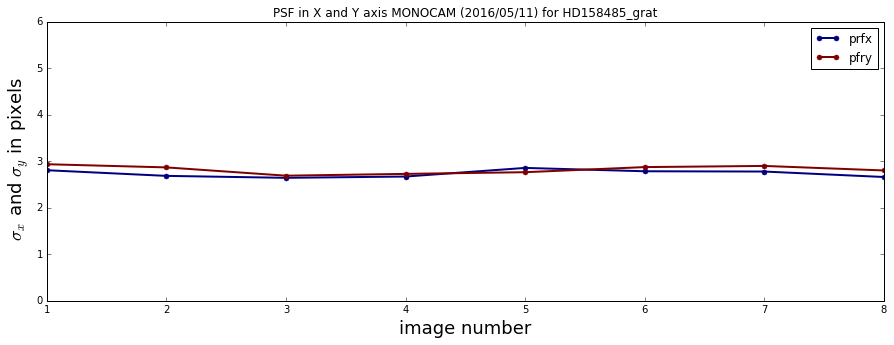

In [20]:
fig = plt.figure()
full_dataset_2=full_dataset[['num', 'prfx','pfry']]
ax=full_dataset_2.plot('num',['prfx','pfry'],lw=2,colormap='jet',marker='.',markersize=10,title='PSF in X and Y axis MONOCAM (2016/05/11) for HD158485_grat',ylim=(0.,6.),figsize=(15,5))
ax.set_xlabel("image number",fontsize=18)
ax.set_ylabel(" $\sigma_x$ and $\sigma_y$ in pixels",fontsize=18)
title='PSF in X and Y axis MONOCAM (2016/05/09) for HD163466_y4'
fig.suptitle(title, fontsize=20)
plt.legend(loc='upper right')

fig.savefig('PRFXY_HD163466_y4_20160509.jpg')
plt.show()  # pandas able to remove NaN



In [21]:
PixToArcsec=0.944

In [22]:
sigmax=full_dataset['prfx']*PixToArcsec

In [23]:
series_sigmax=pd.Series(sigmax)

In [24]:
sigmay=full_dataset['pfry']*PixToArcsec

In [25]:
series_sigmay=pd.Series(sigmay)

In [26]:
full_dataset

,num,file,time,exposure,nbstars,prfx,pfry,sig_prfx,sig_prfy
0,1,AssScImHD163466_y4_1.fits,2016-05-10T08:43:22.192,3.0,23,2.808105,2.937096,0.071711,0.076083
1,2,AssScImHD163466_y4_2.fits,2016-05-10T08:43:29.513,3.0,23,2.686555,2.868796,0.081985,0.045649
2,3,AssScImHD163466_y4_3.fits,2016-05-10T08:43:36.463,3.0,25,2.644529,2.690760,0.075594,0.028622
3,4,AssScImHD163466_y4_4.fits,2016-05-10T08:43:43.448,3.0,30,2.672307,2.729327,0.070884,0.249820
4,5,AssScImHD163466_y4_5.fits,2016-05-10T08:44:47.481,1.5,16,2.857706,2.765514,0.236654,0.072439
5,6,AssScImHD163466_y4_6.fits,2016-05-10T08:44:52.918,1.5,14,2.785756,2.875393,0.080799,0.058559
6,7,AssScImHD163466_y4_7.fits,2016-05-10T08:44:58.453,1.5,11,2.779681,2.900445,0.062352,0.040581
7,8,AssScImHD163466_y4_8.fits,2016-05-10T08:45:04.001,1.5,13,2.662232,2.803133,0.074704,0.081074


### simply add series as columns in the dataset

In [27]:
full_dataset['sigmax'] = series_sigmax

In [28]:
full_dataset['sigmay'] = series_sigmay

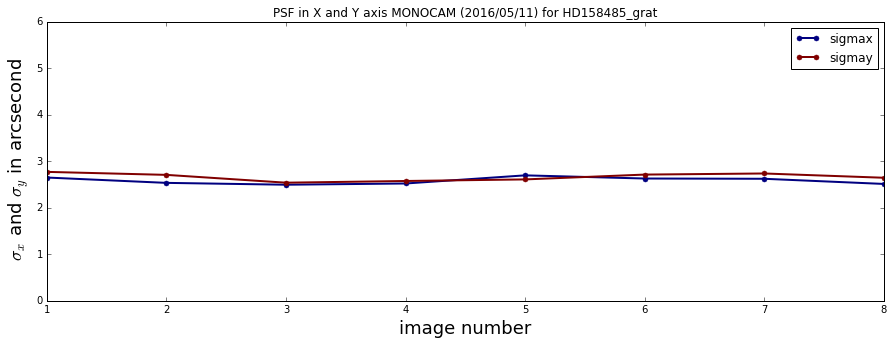

In [29]:
fig = plt.figure()
full_dataset_3=full_dataset[['num', 'sigmax','sigmay']]
ax=full_dataset_3.plot('num',['sigmax','sigmay'],lw=2,colormap='jet',marker='.',markersize=10,title='PSF in X and Y axis MONOCAM (2016/05/11) for HD158485_grat',ylim=(0.,6.),figsize=(15,5))
ax.set_xlabel("image number",fontsize=18)
ax.set_ylabel(" $\sigma_x$ and $\sigma_y$ in arcsecond",fontsize=18)
title='PSF in X and Y axis MONOCAM (2016/05/09) for HD164466_y4'
fig.suptitle(title, fontsize=20)
plt.legend(loc='upper right')
plt.show()  # pandas able to remove NaN
fig.savefig('PSFXY_HD163466_y4_20160509.jpg')

In [30]:
output_table=Table.from_pandas(full_dataset)

In [31]:
output_table

num,file,time,exposure,nbstars,prfx,pfry,sig_prfx,sig_prfy,sigmax,sigmay
int32,str25,str23,float64,int32,float64,float64,float64,float64,float64,float64
1,AssScImHD163466_y4_1.fits,2016-05-10T08:43:22.192,3.0,23,2.80810530353,2.93709578691,0.0717107607457,0.0760826986652,2.65085140654,2.77261842284
2,AssScImHD163466_y4_2.fits,2016-05-10T08:43:29.513,3.0,23,2.68655532696,2.86879575208,0.0819848604541,0.0456488029924,2.53610822865,2.70814318997
3,AssScImHD163466_y4_3.fits,2016-05-10T08:43:36.463,3.0,25,2.64452856755,2.69076001366,0.0755942751507,0.0286223131641,2.49643496776,2.54007745289
4,AssScImHD163466_y4_4.fits,2016-05-10T08:43:43.448,3.0,30,2.6723065947,2.72932681468,0.0708837703989,0.249819800909,2.52265742539,2.57648451306
5,AssScImHD163466_y4_5.fits,2016-05-10T08:44:47.481,1.5,16,2.85770605392,2.76551370117,0.236654258462,0.0724385881085,2.6976745149,2.61064493391
6,AssScImHD163466_y4_6.fits,2016-05-10T08:44:52.918,1.5,14,2.78575614456,2.87539302862,0.0807985674717,0.0585594161166,2.62975380047,2.71437101901
7,AssScImHD163466_y4_7.fits,2016-05-10T08:44:58.453,1.5,11,2.77968098699,2.90044545098,0.0623518794852,0.0405807569436,2.62401885172,2.73802050573
8,AssScImHD163466_y4_8.fits,2016-05-10T08:45:04.001,1.5,13,2.66223236329,2.8031331225,0.0747038608423,0.08107409864,2.51314735094,2.64615766764


In [32]:
outputtablefile='HD163466_y4_1-8_TablePSF_night20160509.fits'
output_table.write(outputtablefile,format='fits')

In [33]:
t2 = Table.read(outputtablefile)

In [34]:
t2

num,file,time,exposure,nbstars,prfx,pfry,sig_prfx,sig_prfy,sigmax,sigmay
int32,str25,str23,float64,int32,float64,float64,float64,float64,float64,float64
1,AssScImHD163466_y4_1.fits,2016-05-10T08:43:22.192,3.0,23,2.80810530353,2.93709578691,0.0717107607457,0.0760826986652,2.65085140654,2.77261842284
2,AssScImHD163466_y4_2.fits,2016-05-10T08:43:29.513,3.0,23,2.68655532696,2.86879575208,0.0819848604541,0.0456488029924,2.53610822865,2.70814318997
3,AssScImHD163466_y4_3.fits,2016-05-10T08:43:36.463,3.0,25,2.64452856755,2.69076001366,0.0755942751507,0.0286223131641,2.49643496776,2.54007745289
4,AssScImHD163466_y4_4.fits,2016-05-10T08:43:43.448,3.0,30,2.6723065947,2.72932681468,0.0708837703989,0.249819800909,2.52265742539,2.57648451306
5,AssScImHD163466_y4_5.fits,2016-05-10T08:44:47.481,1.5,16,2.85770605392,2.76551370117,0.236654258462,0.0724385881085,2.6976745149,2.61064493391
6,AssScImHD163466_y4_6.fits,2016-05-10T08:44:52.918,1.5,14,2.78575614456,2.87539302862,0.0807985674717,0.0585594161166,2.62975380047,2.71437101901
7,AssScImHD163466_y4_7.fits,2016-05-10T08:44:58.453,1.5,11,2.77968098699,2.90044545098,0.0623518794852,0.0405807569436,2.62401885172,2.73802050573
8,AssScImHD163466_y4_8.fits,2016-05-10T08:45:04.001,1.5,13,2.66223236329,2.8031331225,0.0747038608423,0.08107409864,2.51314735094,2.64615766764
